# Part 0: napari

In [1]:
import napari
import imageio.v2 as imageio 
from napari.utils import nbscreenshot

## 1. Loading and visualization

### 1.1 Load

In napari we can either first import the images and then add them to the viewer, or directly open them via the viewer. Here we load the image as a numpy array:

In [2]:
bbbc010_live = imageio.imread('data/Part 1/BBBC010/live.tif')

### 1.2 Visualize

Then we can add the image to the viewer:

In [3]:
viewer = napari.Viewer()
viewer.add_image(bbbc010_live);

Assistant skips harvesting pyclesperanto as it's not installed.
Search napari hub


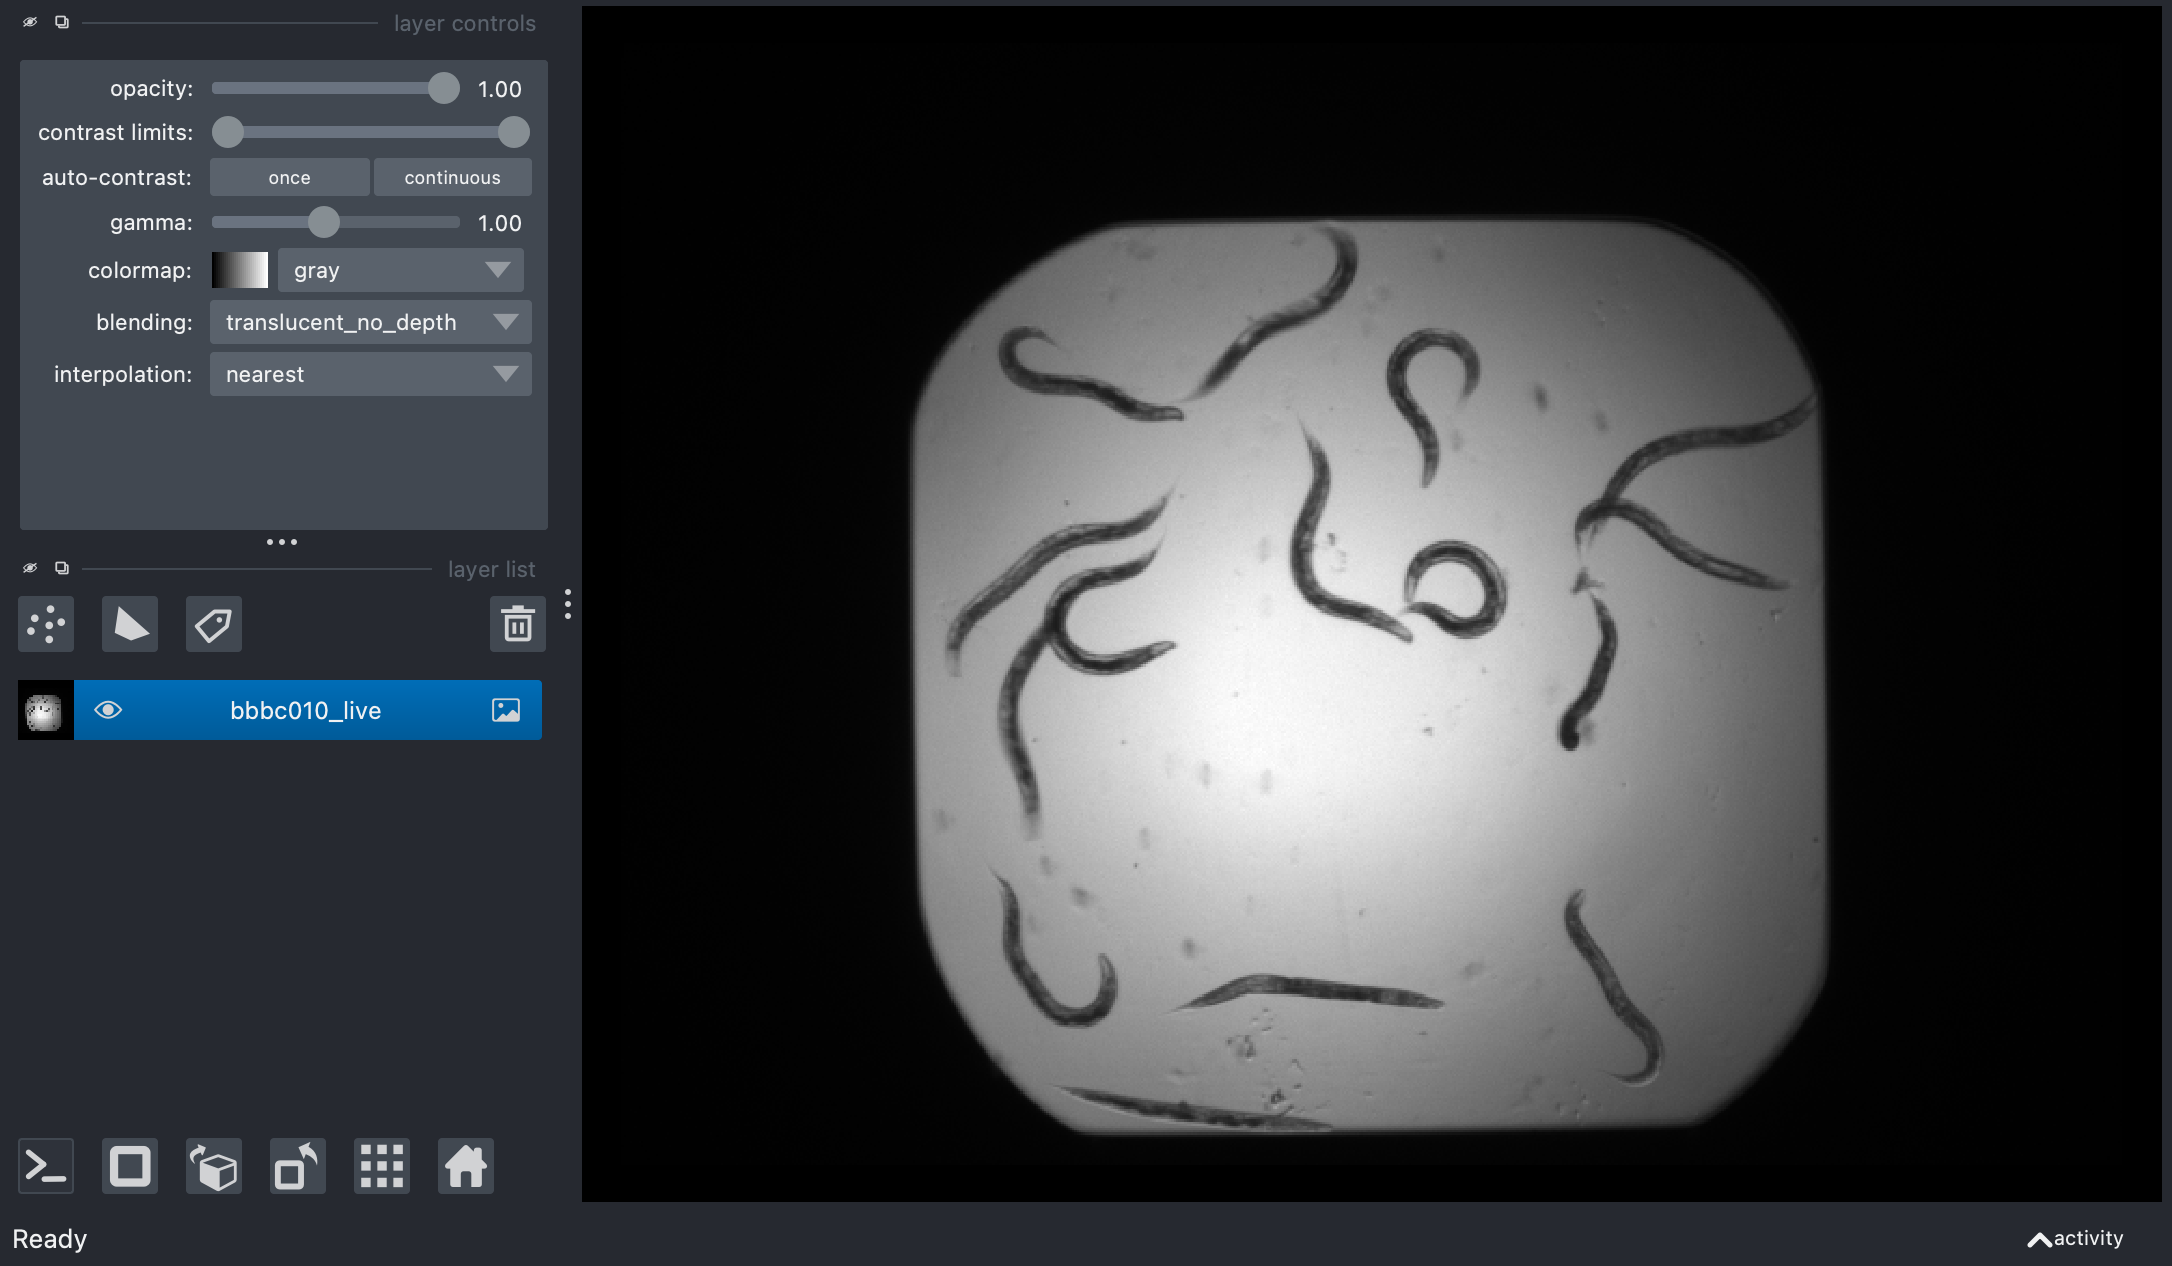

In [7]:
nbscreenshot(viewer)

Alternatively we can simply open images via ```File -> Open File(s)``` or use the ```open``` method of the viewer:

In [8]:
viewer = napari.Viewer()

In [9]:
viewer.open('data/Part 1/BBBC010/live.tif', name='bbbc020_cell_live')
viewer.open('data/Part 1/BBBC010/dead.tif', name='bbbc020_cell_dead');

In [10]:
viewer.open('data/Part 1/BBBC020/membranes.tif', name='membranes')
viewer.open('data/Part 1/BBBC020/nuclei.tif', name='nuclei');

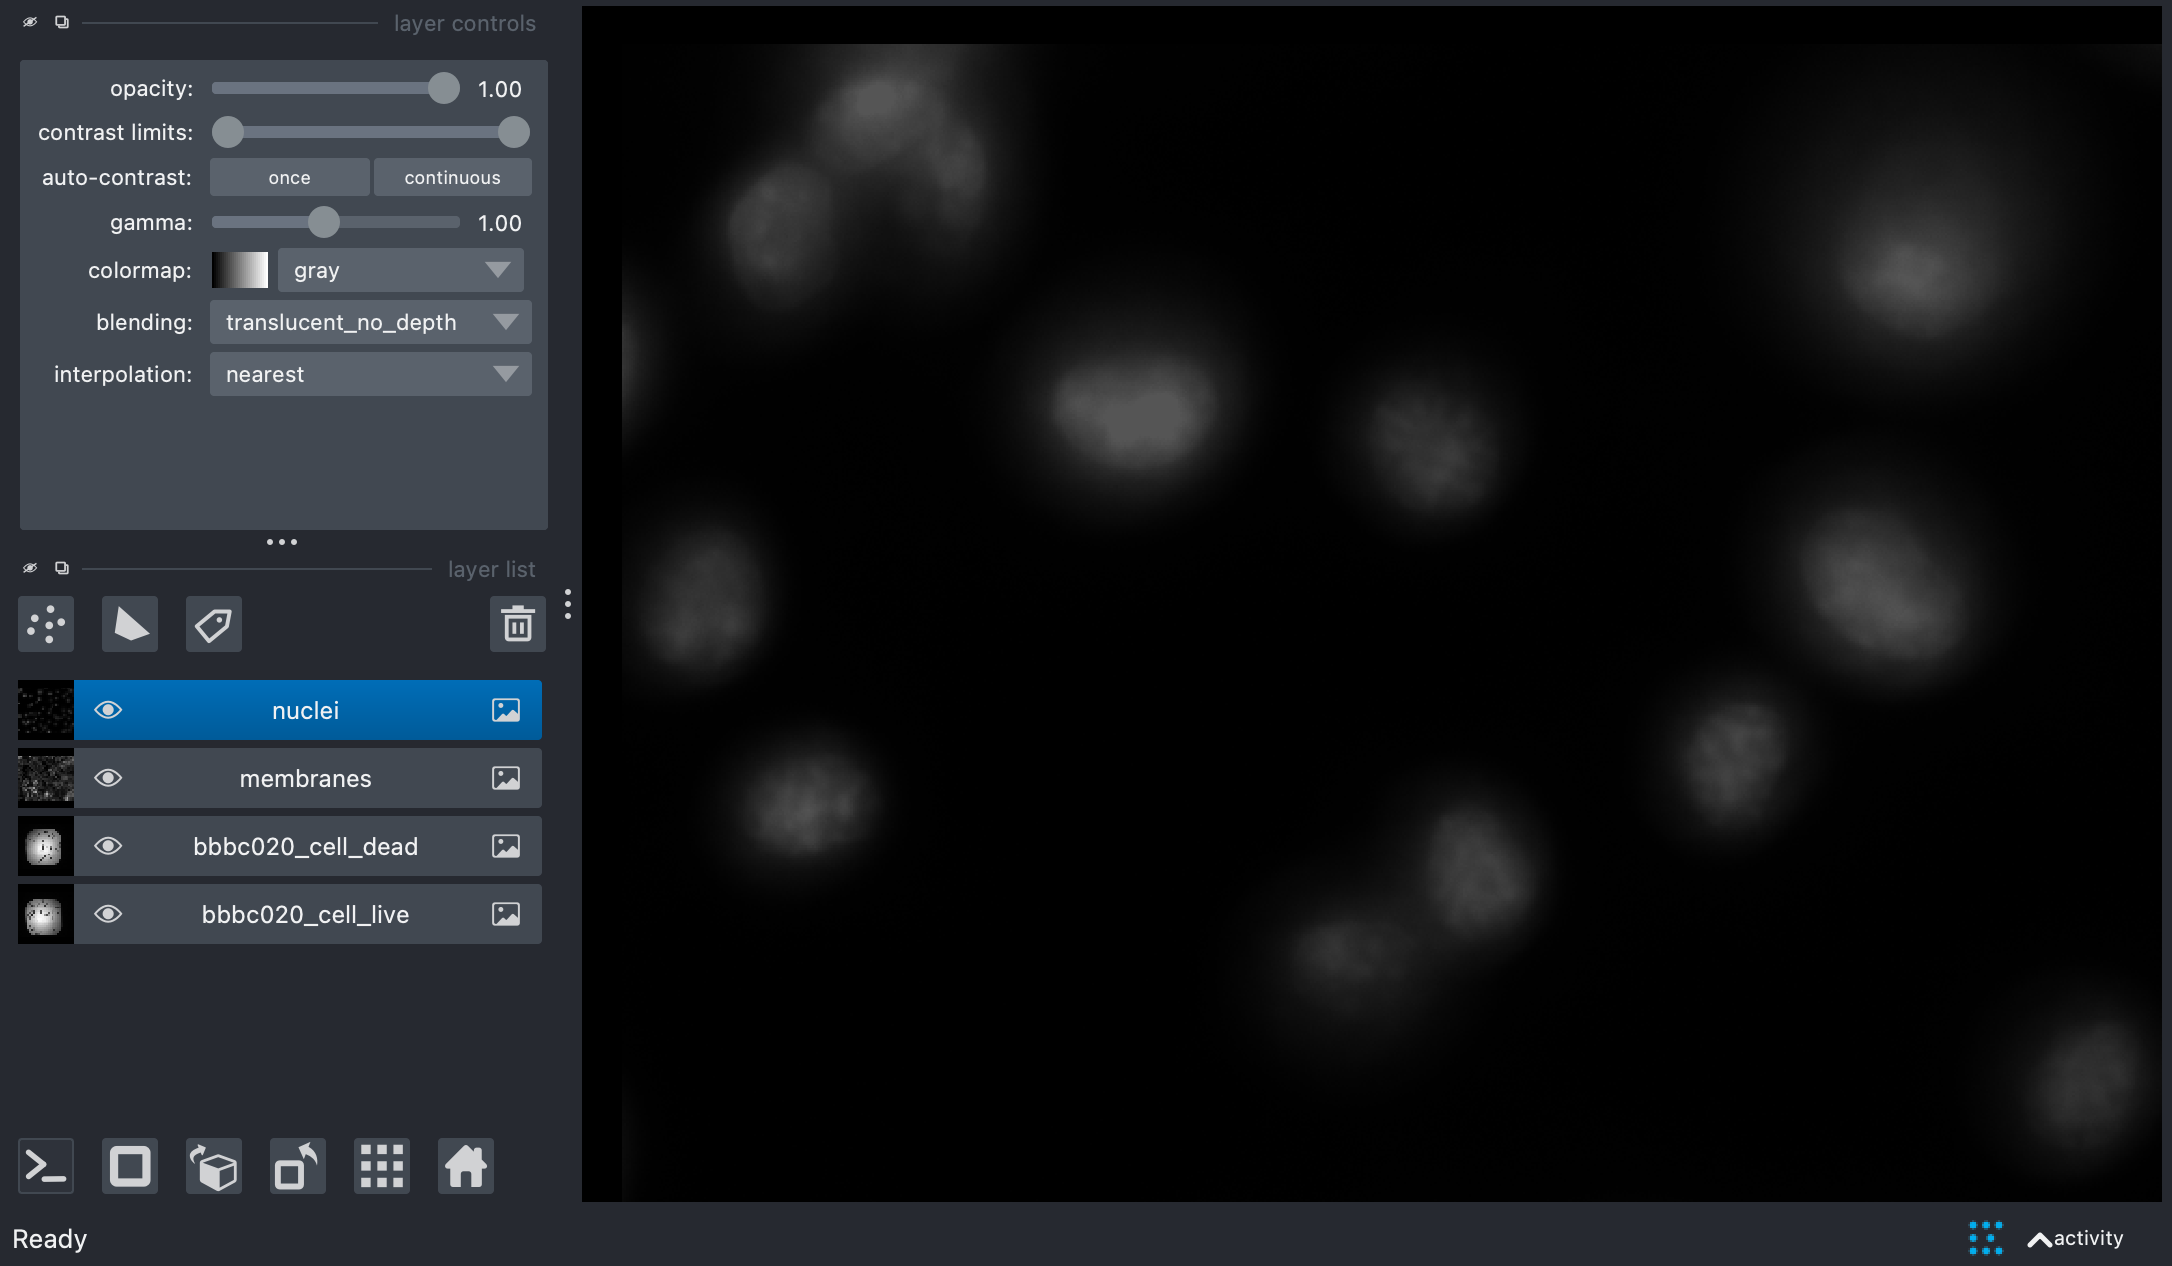

In [11]:
nbscreenshot(viewer)

We can also look at all pictures at once using the grid mode:

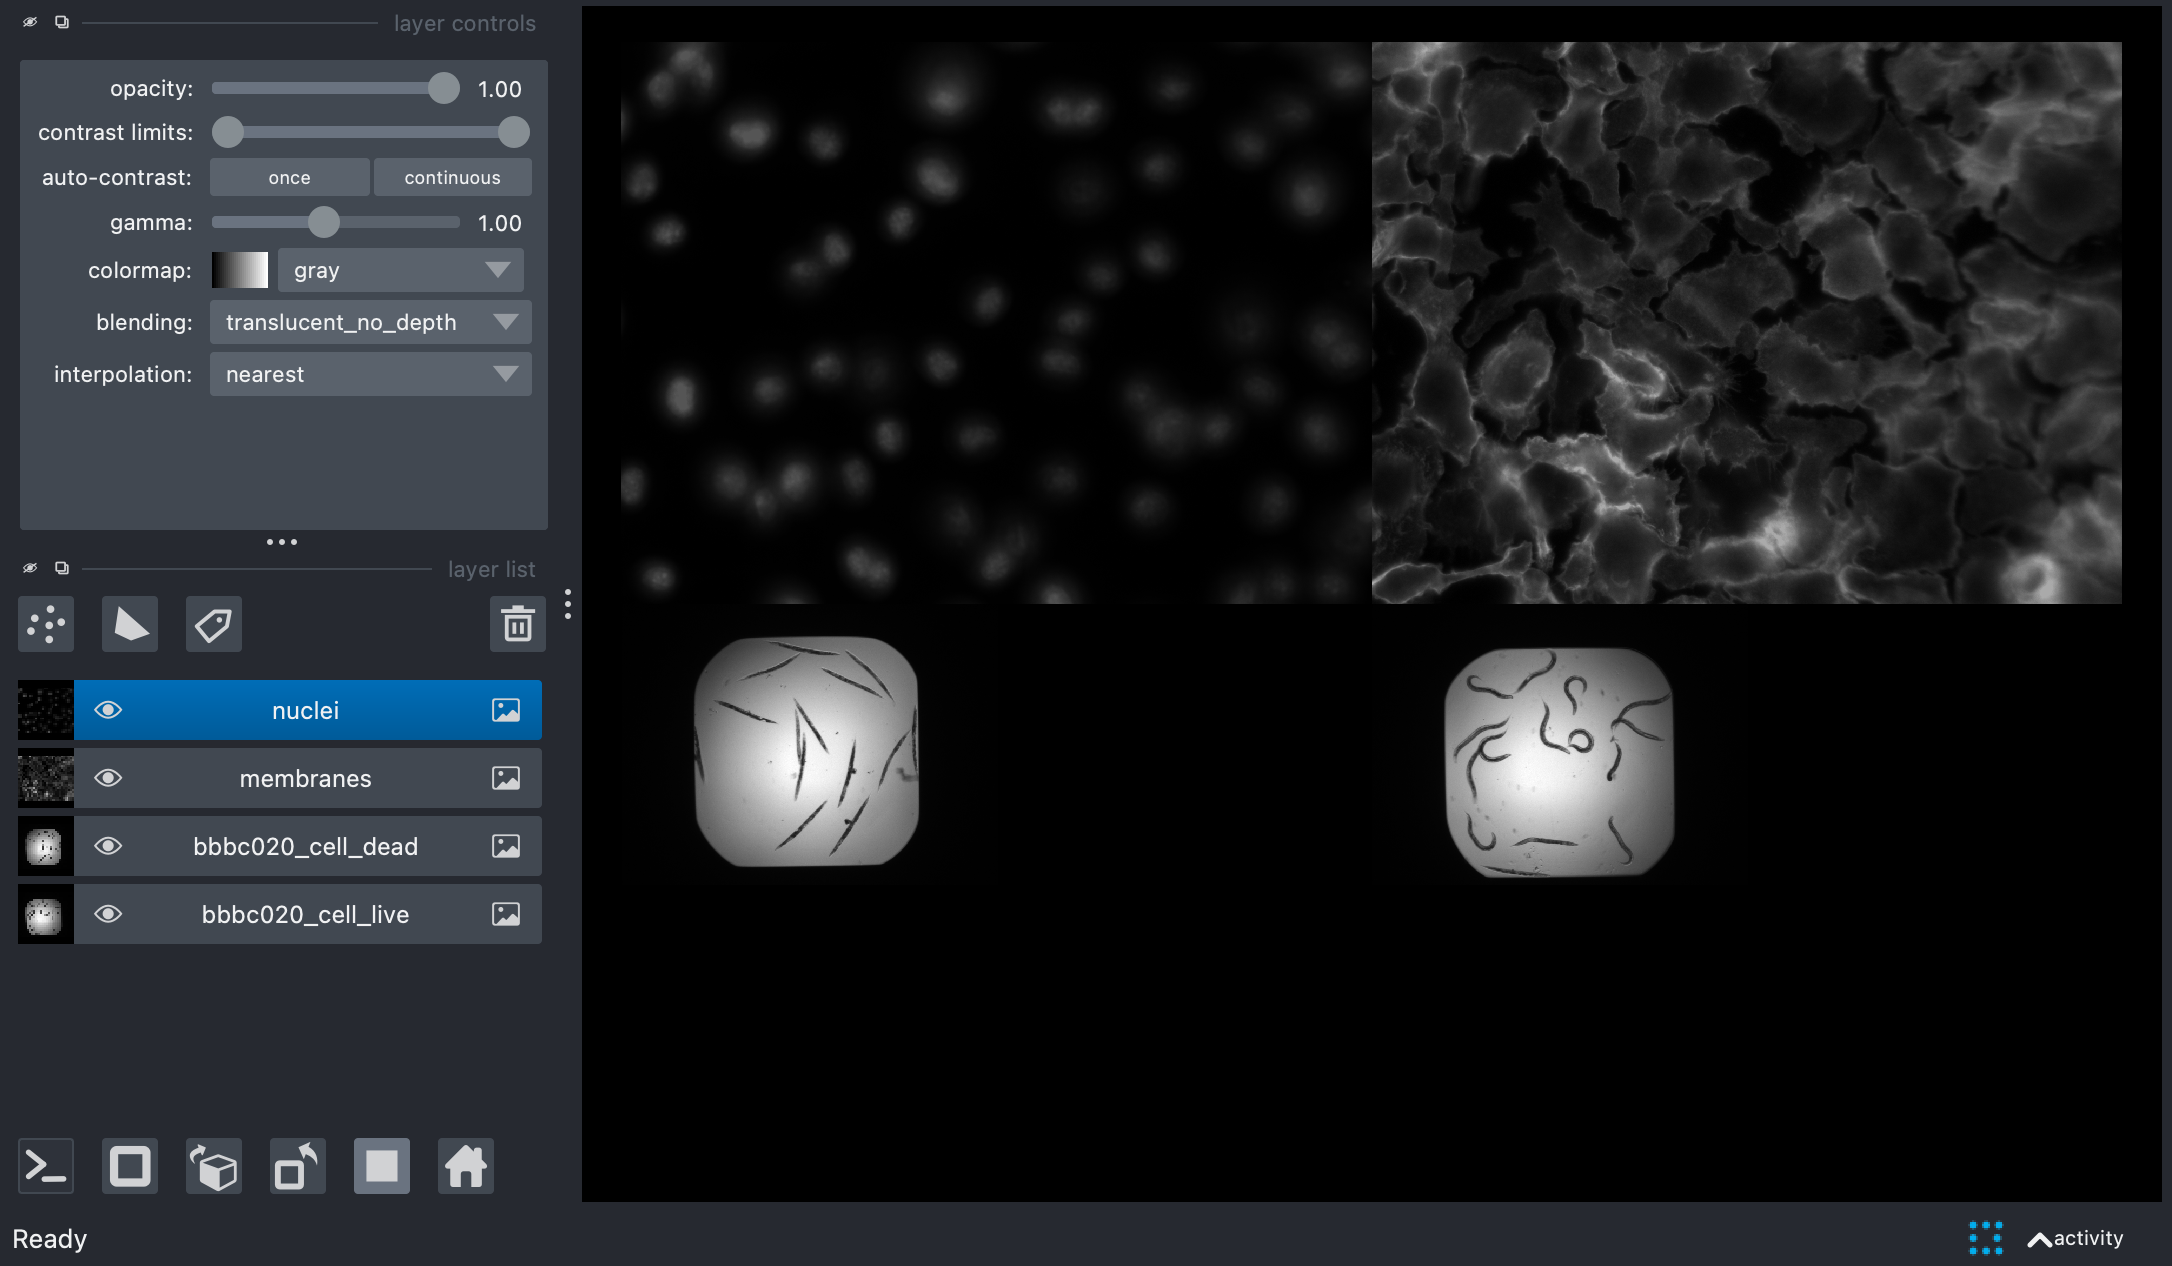

In [12]:
viewer.grid.enabled = True
nbscreenshot(viewer)

### 1.3 Colormaps

In [13]:
viewer.layers['nuclei'].colormap = 'magenta'
viewer.layers['membranes'].colormap = 'yellow'

### 1.4 Cropping

For cropping we can use a plugin for napari called ```napari-crop```:

In [48]:
viewer = napari.Viewer()
viewer.open('data/Part 1/BBBC010/live.tif', name='bbbc020_cell_live');
viewer.window.add_plugin_dock_widget(plugin_name='napari-crop', widget_name='crop_region');

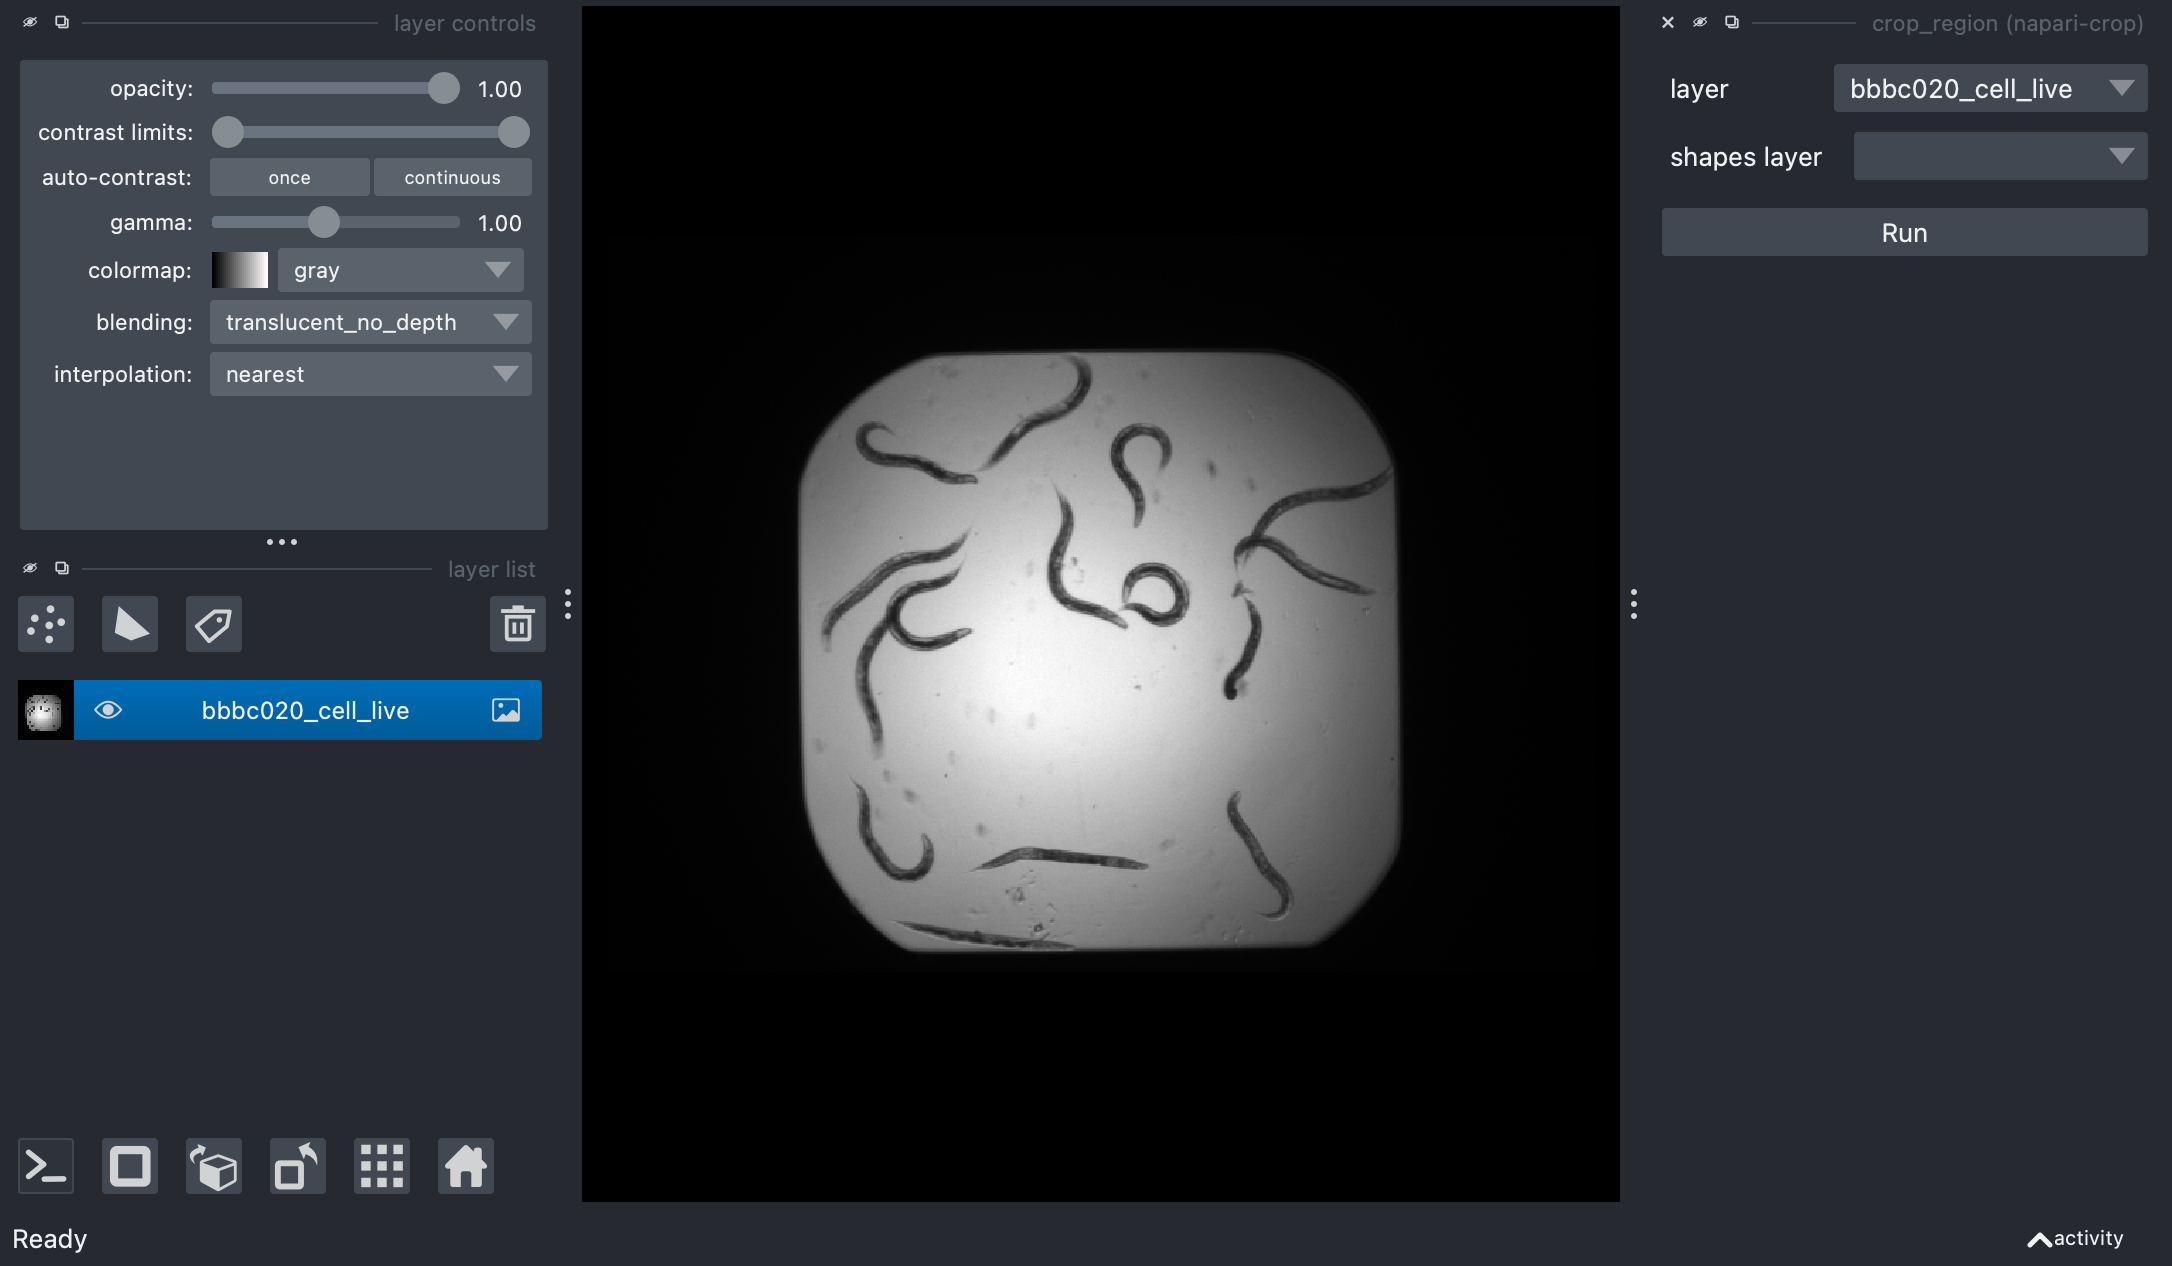

In [49]:
nbscreenshot(viewer)

We see on the right that the plugin will use a shape layer for cropping. So let's add one and a shape:

In [50]:
viewer.add_shapes(data=[[100,250],[300,250],[300,450],[100,450]]);

Now we can use that layer for cropping. We obtain a new image layer with the cropped image:

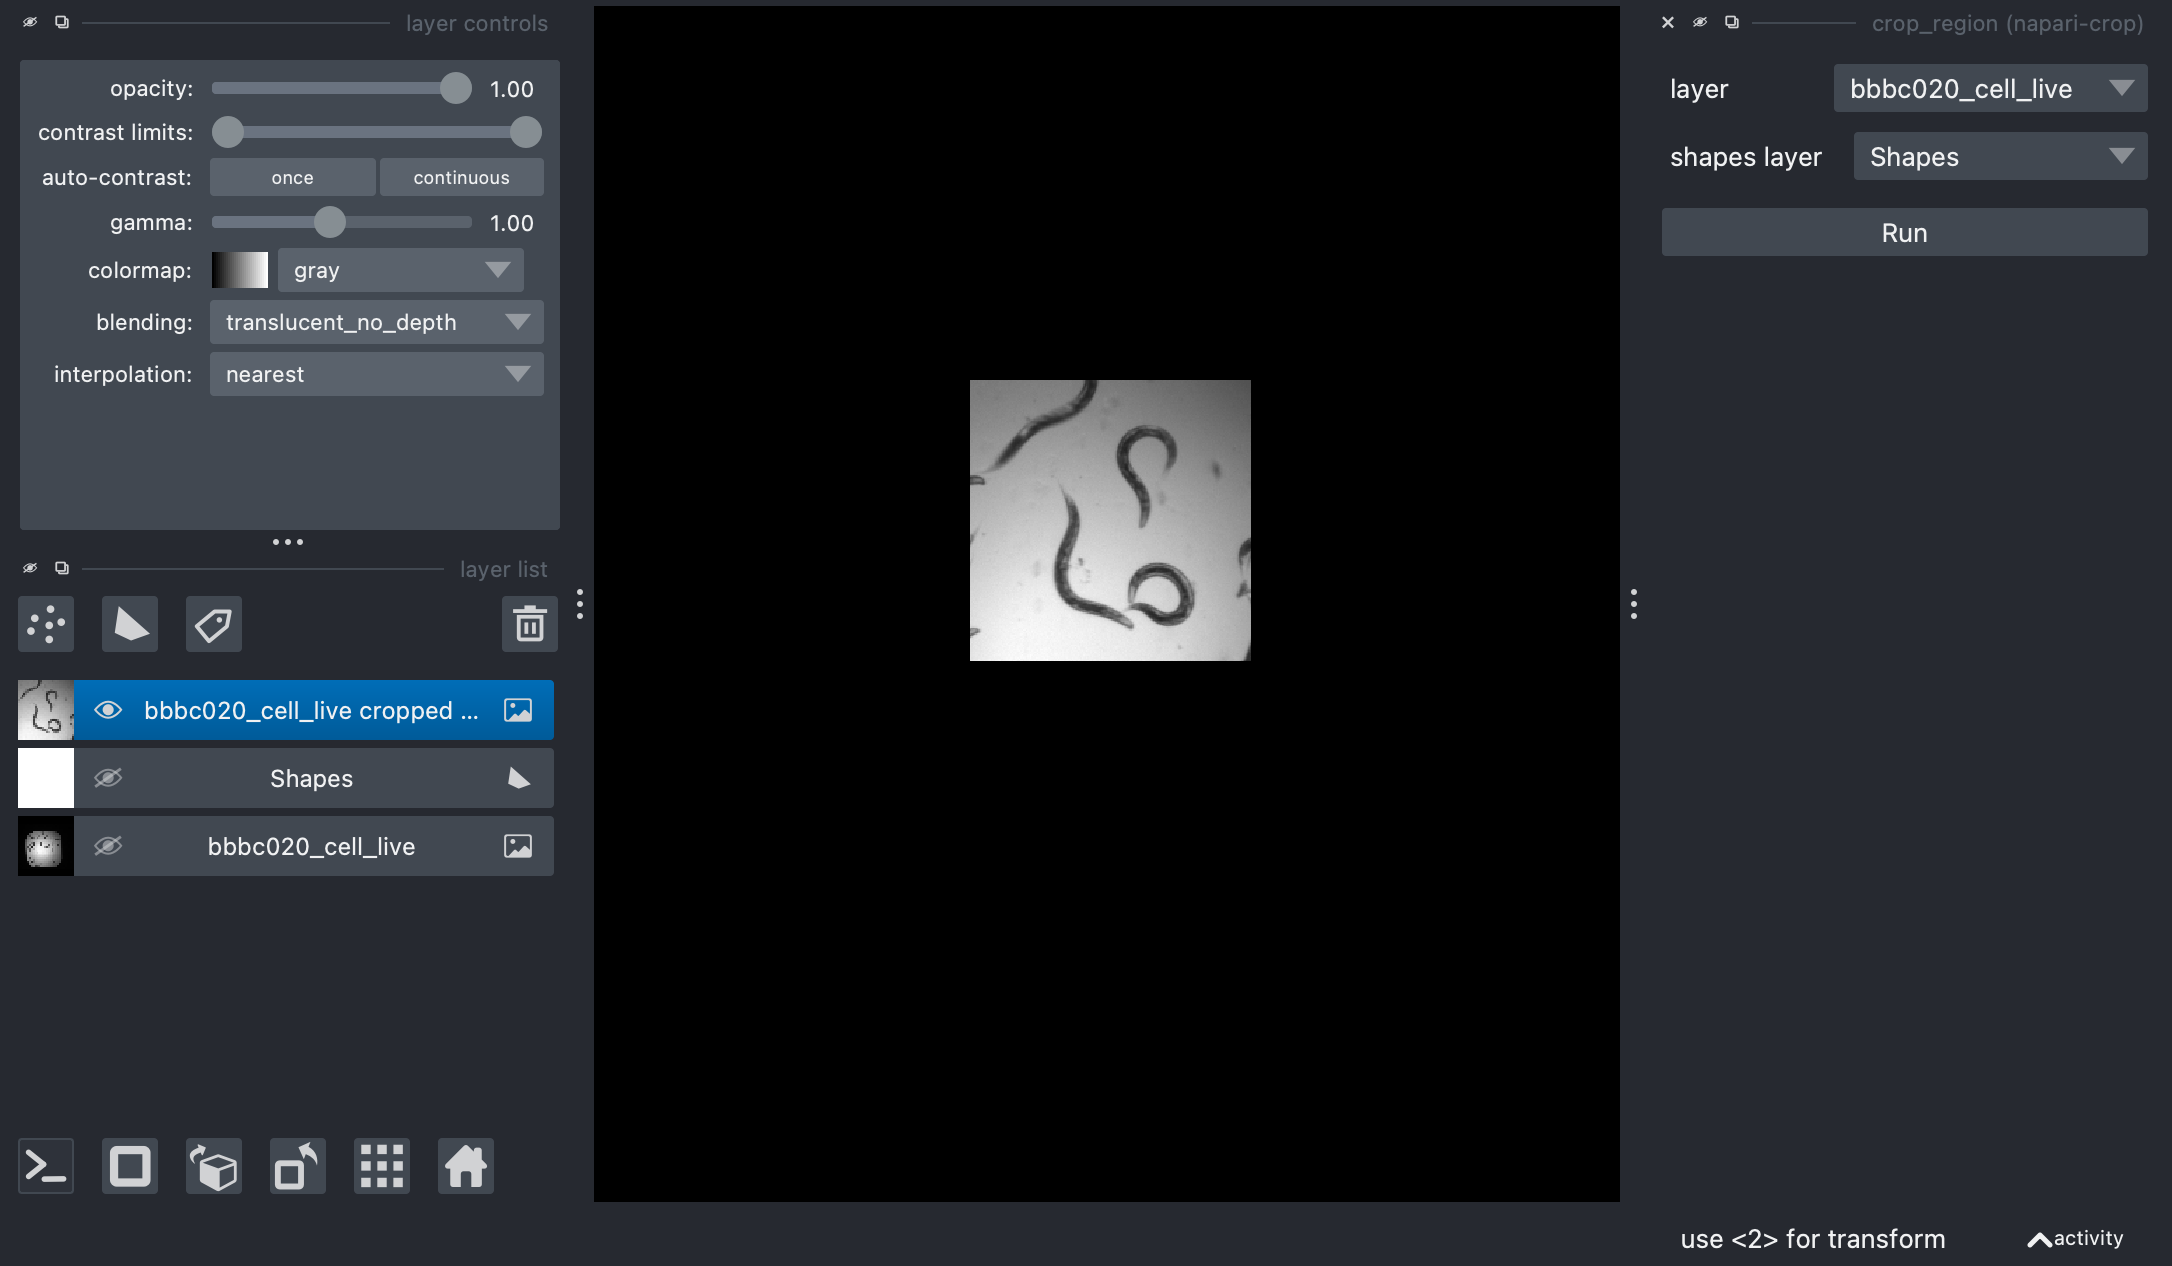

In [51]:
nbscreenshot(viewer)

### 1.5 Roi editing

All components in napari can be edited. For example we can turn the roi into a red square:

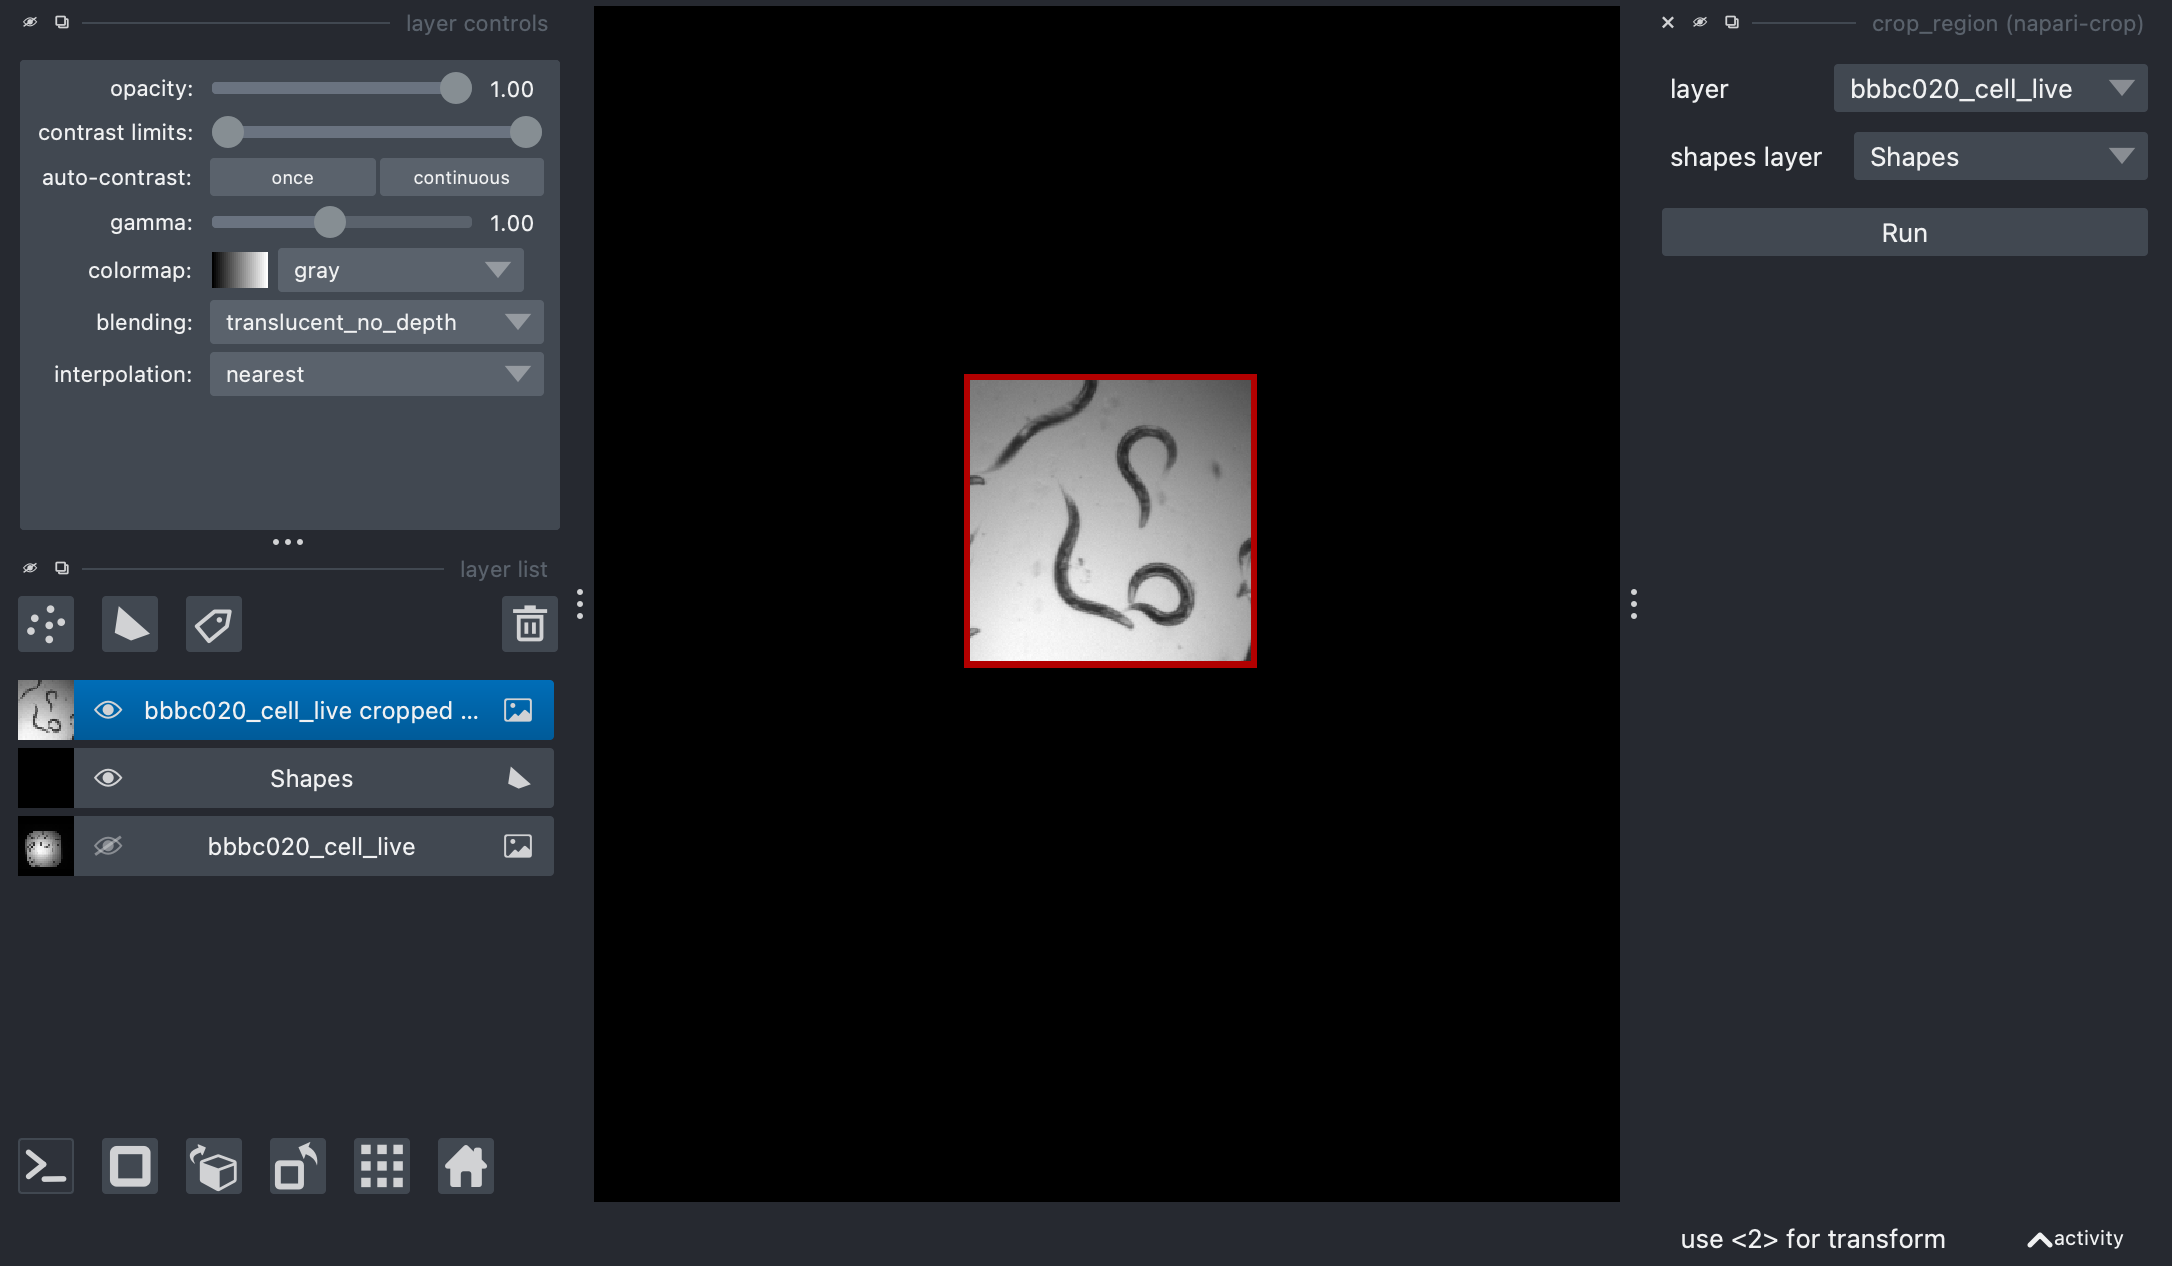

In [53]:
viewer.layers['Shapes'].face_color = [0,0,0,0]
viewer.layers['Shapes'].edge_color = [1,0,0,1]
viewer.layers['Shapes'].edge_width = 10

nbscreenshot(viewer)

## 2. Image modifications

Some image modifications can be executed from plugins similar to ```napari-crop```. Some other more custom modifications need to be done at the array level and are reflected in the viewer.

### 2.1 Masking

Masking, where we change the pixel values in a certain region, needs to be done at the array level. We can recover the data from a layer:

In [54]:
masked_img = viewer.layers['bbbc020_cell_live'].data.copy()

And then mask it:

In [55]:
# Region to be masked
(width, height) = masked_img.shape
origin = (int(0.5*width),int(0.5*height))
size = (int(0.2*width),int(0.2*height))

# Masking
masked_img[origin[0]:origin[0]+size[0],origin[1]:origin[1]+size[1]] = 0

In [56]:
viewer.add_image(masked_img, name='masked image');

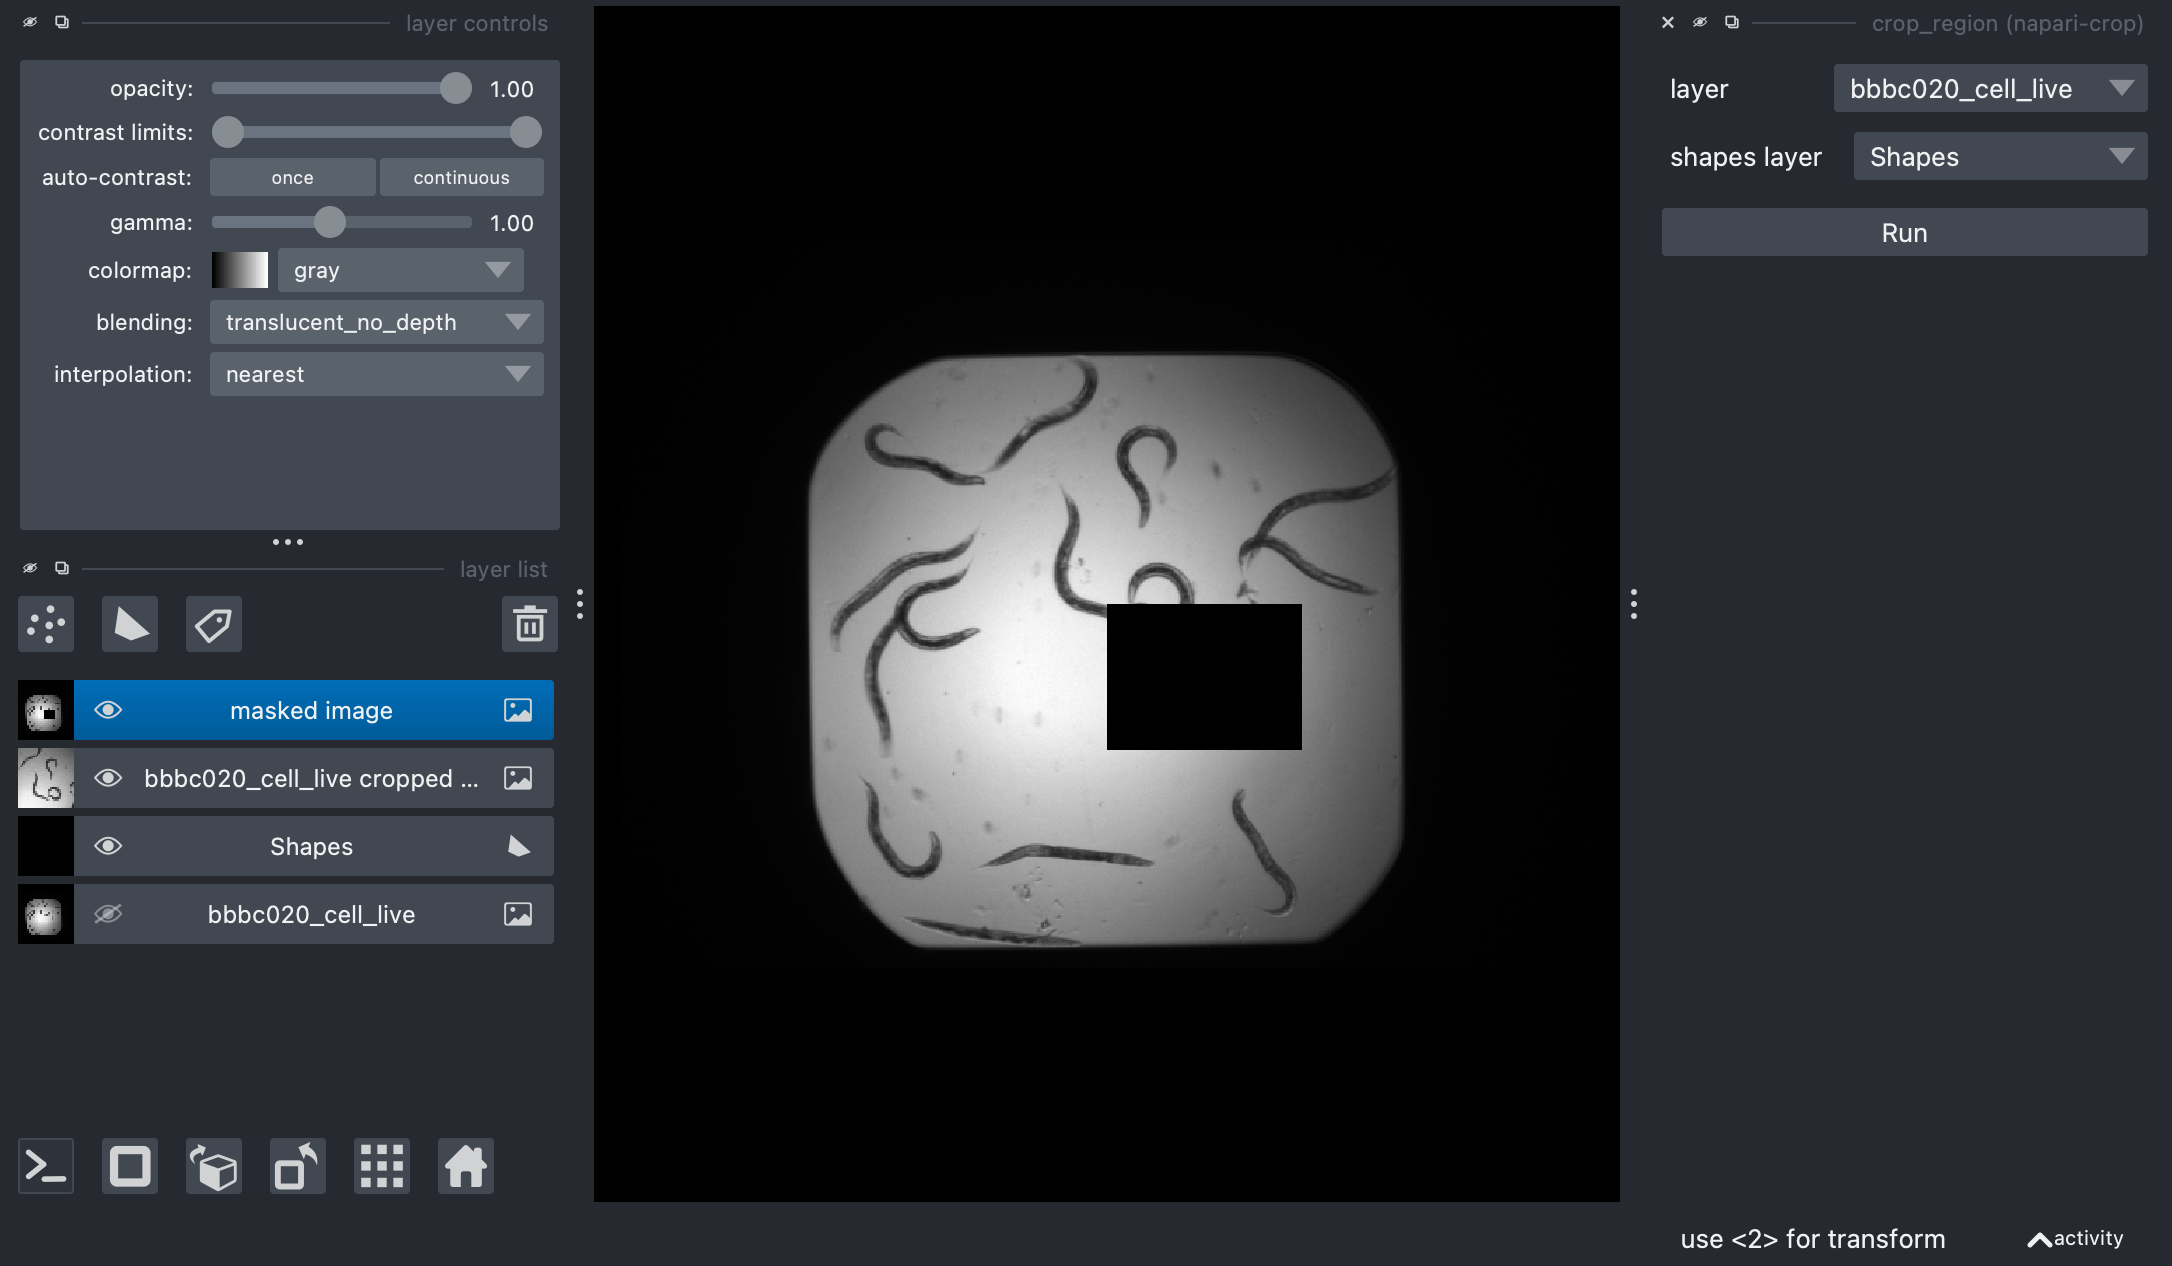

In [57]:
nbscreenshot(viewer)

### 2.2 Inverting

(see later in the session and try to visualize with napari as well!)

### 2.3 Filtering

Fitlering and many other functionalities are provided by the ```napari-skimage``` plugin. For example the interface for Gaussian filtering can be opened via ```Plugin -> napari skimage -> Gaussian filter``` and looks as visible below (note that the code below reproduces what can be done manually in the plugin and is not how plugins are usually used!).

In [35]:
viewer = napari.Viewer()
viewer.open('data/Part 1/BBBC010/live.tif', name='bbbc020_cell_live');

In [36]:
from napari_skimage.skimage_filter_widget import gaussian_filter_widget
gaussian_widget = gaussian_filter_widget()
viewer.window.add_dock_widget(gaussian_widget);
gaussian_widget.sigma.value = 10
gaussian_widget()
viewer.grid.enabled = True

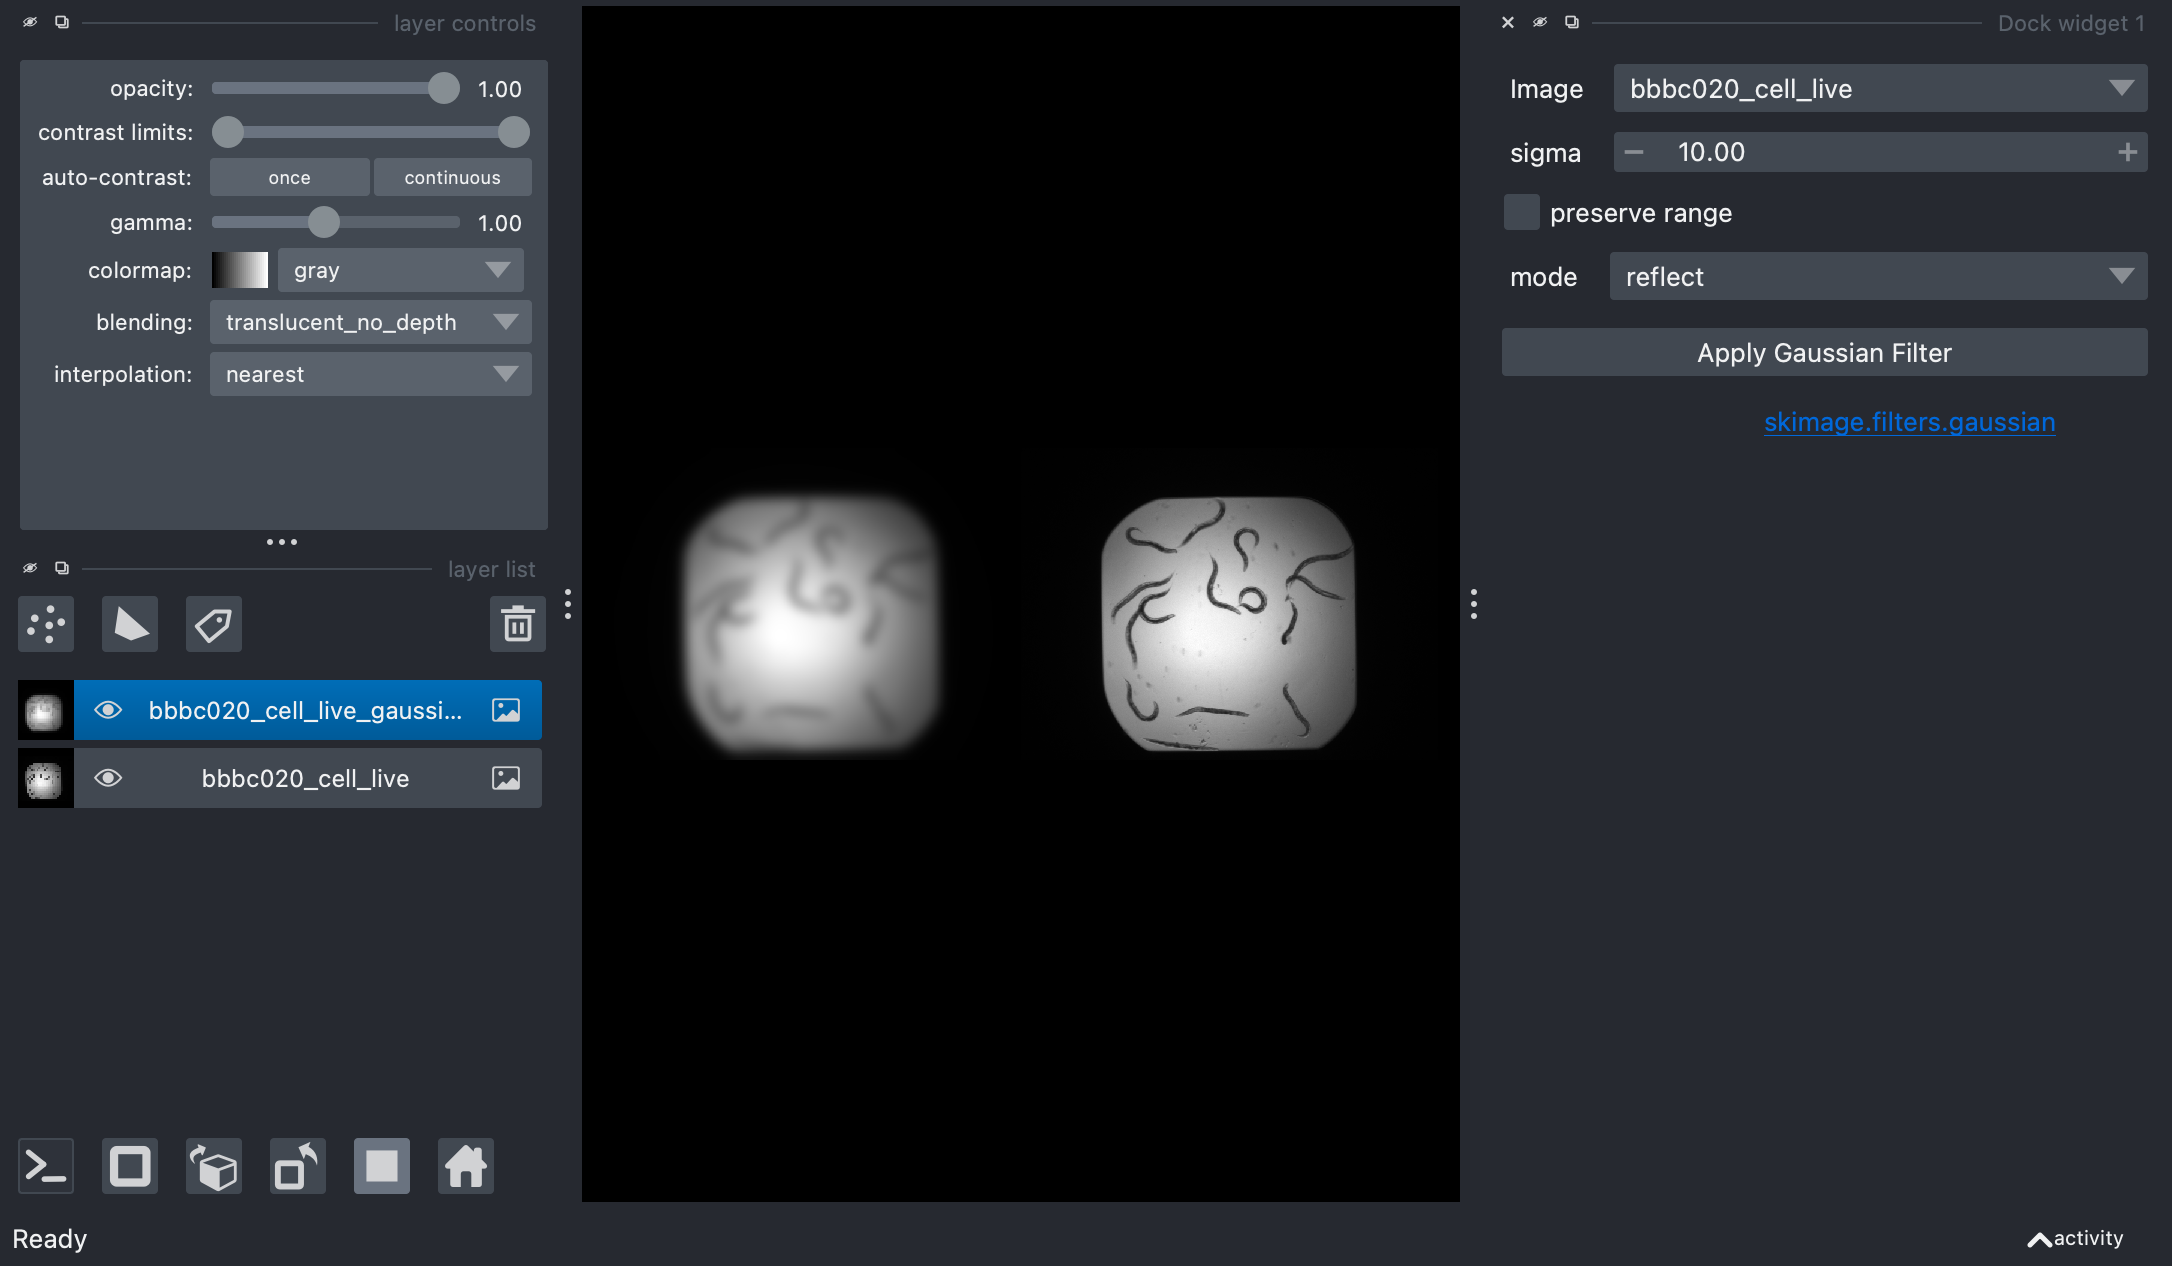

In [37]:
nbscreenshot(viewer)

### 2.4 Image processing

Multiple operations can be combined to perform image processing. For example we can first filter and image with a Gaussian filter and then subtract it from the original image. Operations between images are available under ```Plugins -> napari skimage -> Image pairs maths```. Try to find out how to do that via the plugin. Does it work as expected? How can you fix it.

## 3. Export

The images in the napari viewer can be exported in various ways. First we can take a screenshot of the viewer from ```File -> Save screenshot```. **This is not meant to save scientific data** but more to generate documentation or visualizations for presentations. The data present in layers can be saved via ```File -> Save Selected Layers```. Note that this feature is not optimized and you should expect trouble from time to time.  